In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import os
#from torchvision.models import get_model, get_model_weights, list_models
from torchvision.models import get_model, get_model_weights, get_weight, list_models

In [2]:
print(torch.__version__)

2.0.1


In [3]:
print(torchvision.__version__)

0.15.2


In [4]:
print("Torch buildin models:", list_models())

Torch buildin models: ['alexnet', 'convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'deeplabv3_mobilenet_v3_large', 'deeplabv3_resnet101', 'deeplabv3_resnet50', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 'efficientnet_v2_s', 'fasterrcnn_mobilenet_v3_large_320_fpn', 'fasterrcnn_mobilenet_v3_large_fpn', 'fasterrcnn_resnet50_fpn', 'fasterrcnn_resnet50_fpn_v2', 'fcn_resnet101', 'fcn_resnet50', 'fcos_resnet50_fpn', 'googlenet', 'inception_v3', 'keypointrcnn_resnet50_fpn', 'lraspp_mobilenet_v3_large', 'maskrcnn_resnet50_fpn', 'maskrcnn_resnet50_fpn_v2', 'maxvit_t', 'mc3_18', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'mvit_v1_b', 'mvit_v2_s', 'quantized_googlenet', 'quantized_inception_v3', '

In [5]:
torchvisionallmodels=list_models(module=torchvision.models)
print("Torchvision buildin models:", torchvisionallmodels)

Torchvision buildin models: ['alexnet', 'convnext_base', 'convnext_large', 'convnext_small', 'convnext_tiny', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'efficientnet_v2_l', 'efficientnet_v2_m', 'efficientnet_v2_s', 'googlenet', 'inception_v3', 'maxvit_t', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'regnet_x_16gf', 'regnet_x_1_6gf', 'regnet_x_32gf', 'regnet_x_3_2gf', 'regnet_x_400mf', 'regnet_x_800mf', 'regnet_x_8gf', 'regnet_y_128gf', 'regnet_y_16gf', 'regnet_y_1_6gf', 'regnet_y_32gf', 'regnet_y_3_2gf', 'regnet_y_400mf', 'regnet_y_800mf', 'regnet_y_8gf', 'resnet101', 'resnet152', 'resnet18', 'resnet34', 'resnet50', 'resnext101_32x8d', 'resnext101_64x4d', 'resnext50_32x4d', 'shufflenet_v2_x0_5', 'shufflenet_v2_x1_0', 'shufflenet_v2_x1_5', 'shuffle

In [6]:
print(os.getcwd())

/Users/prabhathr/Desktop/CMPE258/MultiModalClassifier/TorchClassifier


In [7]:
from torchvision.io import read_image
img = read_image("../tests/imgdata/rose.jpeg") #3, 900, 900

In [8]:
import matplotlib.pyplot as plt
plt.ion()   # interactive mode

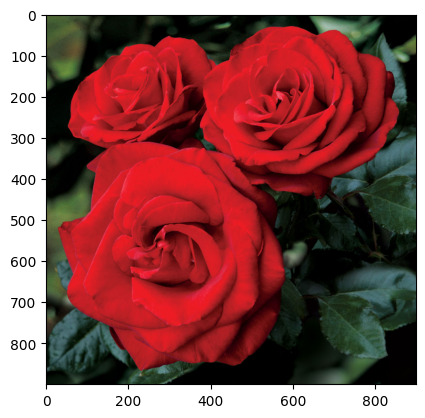

In [9]:
inp = img.numpy().transpose((1, 2, 0))
plt.imshow(inp)

In [10]:
model_name="customresnext50"
# Step 1: Initialize model with the best available weights
weights_enum = get_model_weights(model_name)
print([weight for weight in weights_enum])

ValueError: Unknown model customresnext50

In [16]:
weights = get_weight("ResNet50_Weights.IMAGENET1K_V2")#ResNet50_Weights.DEFAULT

In [19]:
currentmodel=get_model(model_name, weights=weights)#weights="DEFAULT"
currentmodel.eval()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\lkk68/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:00<00:00, 111MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [20]:
# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

In [21]:
preprocess

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

C:\Users\lkk68\.conda\envs\mycondapy39\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


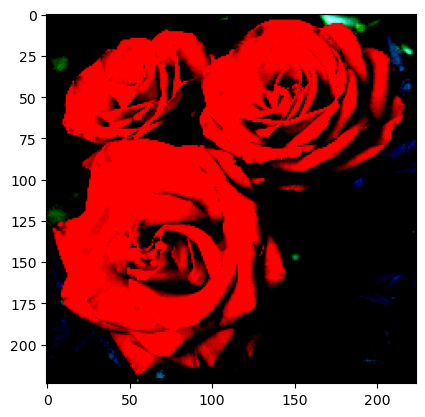

In [22]:
inp = preprocess(img).numpy().transpose((1, 2, 0))
plt.imshow(inp)

In [23]:
# Step 3: Apply inference preprocessing transforms
batch = preprocess(img).unsqueeze(0)
batch.shape

torch.Size([1, 3, 224, 224])

In [24]:
# Step 4: Use the model and print the predicted category
prediction = currentmodel(batch).squeeze(0).softmax(0)
prediction

tensor([3.1972e-04, 3.3951e-04, 2.6910e-04, 2.3369e-04, 1.6689e-04, 1.4678e-04,
        1.8888e-04, 2.8034e-04, 2.4709e-04, 2.8735e-04, 3.5791e-04, 4.1452e-04,
        3.2543e-04, 3.0435e-04, 2.5897e-04, 8.3286e-04, 8.9149e-04, 3.0519e-04,
        2.8542e-04, 3.9526e-04, 4.5405e-04, 1.8876e-04, 2.3513e-04, 3.4530e-04,
        4.0943e-04, 2.4909e-04, 1.9991e-04, 3.7701e-04, 4.1854e-04, 1.7230e-04,
        1.2717e-04, 3.7053e-04, 2.6010e-04, 1.6440e-04, 1.2243e-04, 2.4380e-04,
        4.7336e-04, 5.2103e-04, 2.7842e-04, 2.7897e-04, 1.0567e-03, 1.5327e-04,
        3.9340e-04, 2.8277e-04, 3.4129e-04, 2.5740e-04, 4.9348e-04, 3.5858e-04,
        3.7015e-04, 2.0165e-04, 2.8483e-04, 2.6004e-04, 3.5973e-04, 2.9679e-04,
        1.5950e-04, 5.6572e-04, 3.0940e-04, 6.2137e-04, 2.7119e-04, 1.0365e-03,
        2.3411e-04, 2.3598e-04, 2.2760e-04, 4.0271e-04, 3.0368e-04, 1.9202e-04,
        4.0588e-04, 1.9249e-04, 3.1540e-04, 3.7623e-04, 5.8289e-04, 3.1142e-04,
        1.6599e-04, 4.5541e-05, 1.6620e-

In [25]:
prediction.shape

torch.Size([1000])

In [26]:
class_id = prediction.argmax().item()

In [27]:
class_id

738

In [28]:
score = prediction[class_id].item()
score

0.11733998358249664

In [29]:
#The classes of the pre-trained model outputs can be found at weights.meta["categories"]
weights.meta["categories"]

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

In [30]:
print(len(weights.meta["categories"]))

1000


In [31]:
category_name = weights.meta["categories"][class_id]
category_name

'pot'

In [32]:
print(f"{category_name}: {100 * score:.1f}%")

pot: 11.7%


In [33]:
#torch hub
model = torch.hub.load("pytorch/vision", "resnet50", weights="IMAGENET1K_V2")

Downloading: "https://github.com/pytorch/vision/zipball/main" to C:\Users\lkk68/.cache\torch\hub\main.zip


In [34]:
weight_enum = torch.hub.load("pytorch/vision", "get_model_weights", name="resnet50")

Using cache found in C:\Users\lkk68/.cache\torch\hub\pytorch_vision_main


In [35]:
print([weight for weight in weight_enum])

[ResNet50_Weights.IMAGENET1K_V1, ResNet50_Weights.IMAGENET1K_V2]


In [37]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [36]:
model.fc

Linear(in_features=2048, out_features=1000, bias=True)